In [420]:
import pandas as pd
import numpy as np
df = pd.read_excel (r'C:\Users\Hp\Downloads\Week1_challenge_data_source.xlsx')
print (df)
import matplotlib.pyplot as plt
import seaborn as sns    # data visualization
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #higher resolution
# importing the style package
from matplotlib import style
# using the style for the plot
plt.style.use('ggplot')
warnings.filterwarnings('ignore')


                   Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18     770.0   
1       13114483482878900224 2019-04-09 13:04:04     235.0   
2       13114483484080500736 2019-04-09 17:42:11       1.0   
3       13114483485442799616 2019-04-10 00:31:25     486.0   
4       13114483499480700928 2019-04-12 20:10:23     565.0   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42     451.0   
149997   7349883264234609664 2019-04-29 07:28:42     483.0   
149998  13114483573367300096 2019-04-29 07:28:43     283.0   
149999  13114483573367300096 2019-04-29 07:28:43     696.0   
150000                                       NaT       NaN   

                       End  End ms  Dur. (ms)          IMSI  MSISDN/Number  \
0      2019-04-25 14:35:31   662.0  1823652.0  2.082014e+14   3.366496e+10   
1      2019-04-25 08:15:48   606.0  1365104.0  2.082019e+14   3.368185e+10   
2      2019-04-25 11:

In [421]:
df.shape

(150001, 55)

In [422]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [ ]:
#relevant variables and associated data types

df.dtypes

# Handling Missing Value


In [425]:
# missing values in the dataset?
def percent_missing(dm):

    # Calculate total number of cells in dataframe
    totalCells = np.product(dm.shape)

    # Count number of missing values per column
    missingCount = dm.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The telecom dataset contains 12.49 % missing values.


In [426]:
# Now which column(s) has missing values
df.isna().sum()


Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [427]:
# drop columns with more than 30% missing values
perc = 30.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count)

#print modified data

mod_df.isna().sum().sort_values(ascending=False)/len(df)*100 
#print(min_count)
#print(data.shape, mod_df.shape)

#print( type (mod_df))

Avg RTT DL (ms)                   18.552543
Avg RTT UL (ms)                   18.541210
Last Location Name                 0.768662
MSISDN/Number                      0.710662
Nb of sec with Vol UL < 1250B      0.528663
UL TP < 10 Kbps (%)                0.527996
UL TP > 300 Kbps (%)               0.527996
50 Kbps < UL TP < 300 Kbps (%)     0.527996
10 Kbps < UL TP < 50 Kbps (%)      0.527996
Nb of sec with Vol DL < 6250B      0.503330
DL TP < 50 Kbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)     0.502663
250 Kbps < DL TP < 1 Mbps (%)      0.502663
DL TP > 1 Mbps (%)                 0.502663
IMEI                               0.381331
Handset Manufacturer               0.381331
Handset Type                       0.381331
IMSI                               0.379997
Activity Duration UL (ms)          0.000667
Start                              0.000667
Activity Duration DL (ms)          0.000667
Avg Bearer TP UL (kbps)            0.000667
Avg Bearer TP DL (kbps)         

In [428]:
#the colums that have no 30% missing vakues 
df.isna().sum()


Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [429]:
# cleaning data frame
mod_df.dropna(subset = ["Bearer Id", "MSISDN/Number"], inplace=True)
cols=['Avg RTT DL (ms)','Avg RTT UL (ms)','Last Location Name','10 Kbps < UL TP < 50 Kbps (%)','Nb of sec with Vol UL < 1250B','50 Kbps < UL TP < 300 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','UL TP < 10 Kbps (%)',
      'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','DL TP > 1 Mbps (%)','250 Kbps < DL TP < 1 Mbps (%)','50 Kbps < DL TP < 250 Kbps (%)','DL TP < 50 Kbps (%)']
for col in cols:
  mod_df[col]=mod_df[col].fillna(method='ffill')

mod_df.isna().sum().sort_values(ascending=False)/len(df)*100

#data.isna().sum().sort_values(ascending=False)/len(data)*100
#print (type(data))

Bearer Id                         0.0
Activity Duration UL (ms)         0.0
Handset Manufacturer              0.0
Handset Type                      0.0
Nb of sec with Vol DL < 6250B     0.0
Nb of sec with Vol UL < 1250B     0.0
Social Media DL (Bytes)           0.0
Social Media UL (Bytes)           0.0
Google DL (Bytes)                 0.0
Google UL (Bytes)                 0.0
Email DL (Bytes)                  0.0
Email UL (Bytes)                  0.0
Youtube DL (Bytes)                0.0
Youtube UL (Bytes)                0.0
Netflix DL (Bytes)                0.0
Netflix UL (Bytes)                0.0
Gaming DL (Bytes)                 0.0
Gaming UL (Bytes)                 0.0
Other DL (Bytes)                  0.0
Other UL (Bytes)                  0.0
Total UL (Bytes)                  0.0
Dur. (ms).1                       0.0
Activity Duration DL (ms)         0.0
Start                             0.0
UL TP > 300 Kbps (%)              0.0
Start ms                          0.0
End         

In [430]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [431]:
df.shape


(150001, 55)

In [432]:
#Transforming Data Scaling and Normalization

In [433]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1317,64.330769
1109,3.954267
1668,240.670039
1852,154.893285
634,52.317423


In [434]:
original_data[0].min(), original_data[0].max()


(0.07934164861686392, 1569.9180556594024)

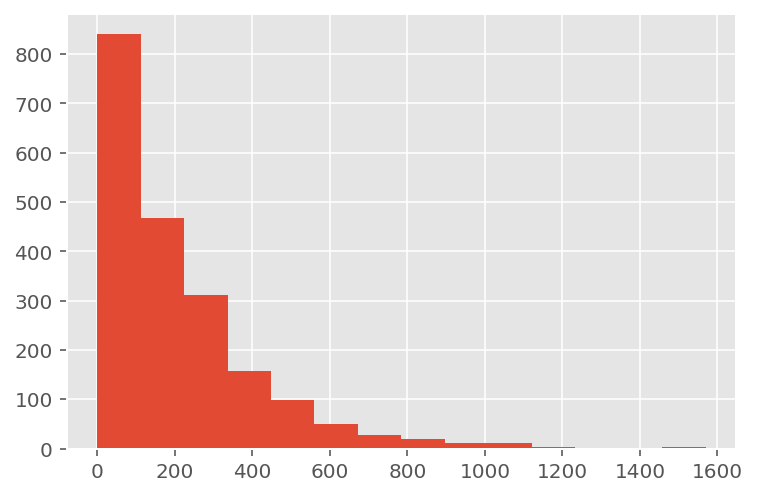

In [435]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

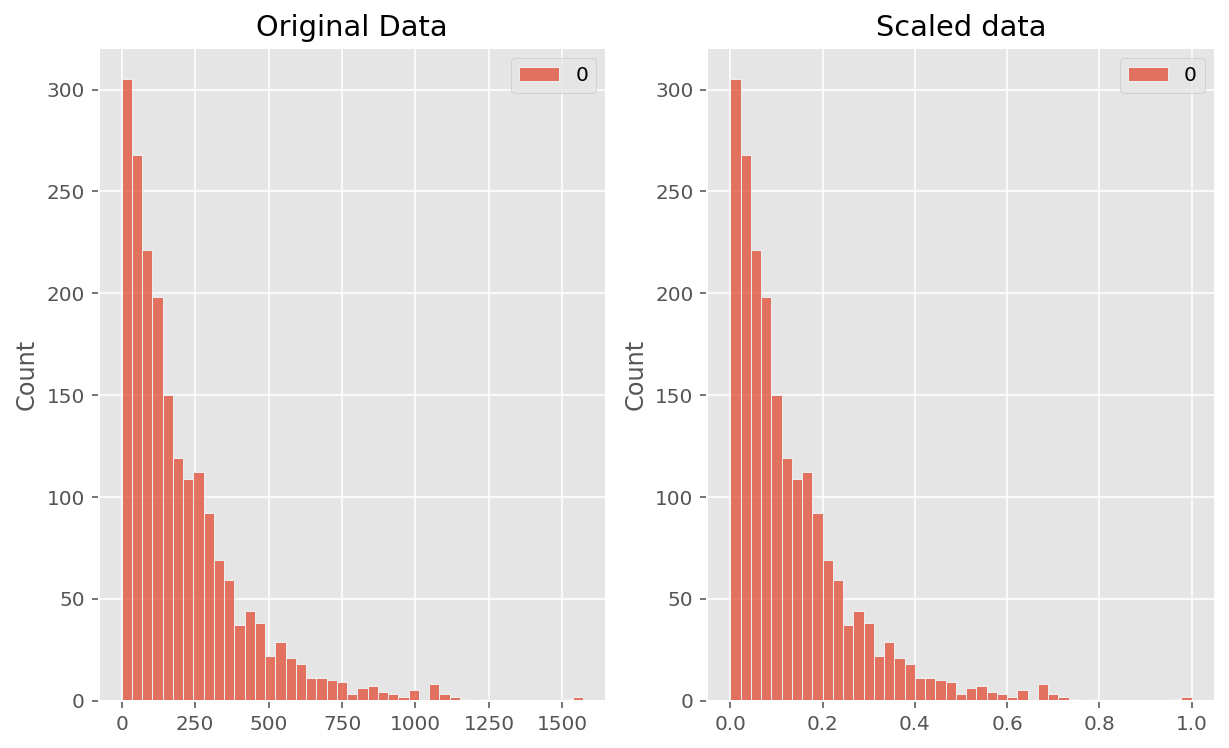

In [436]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

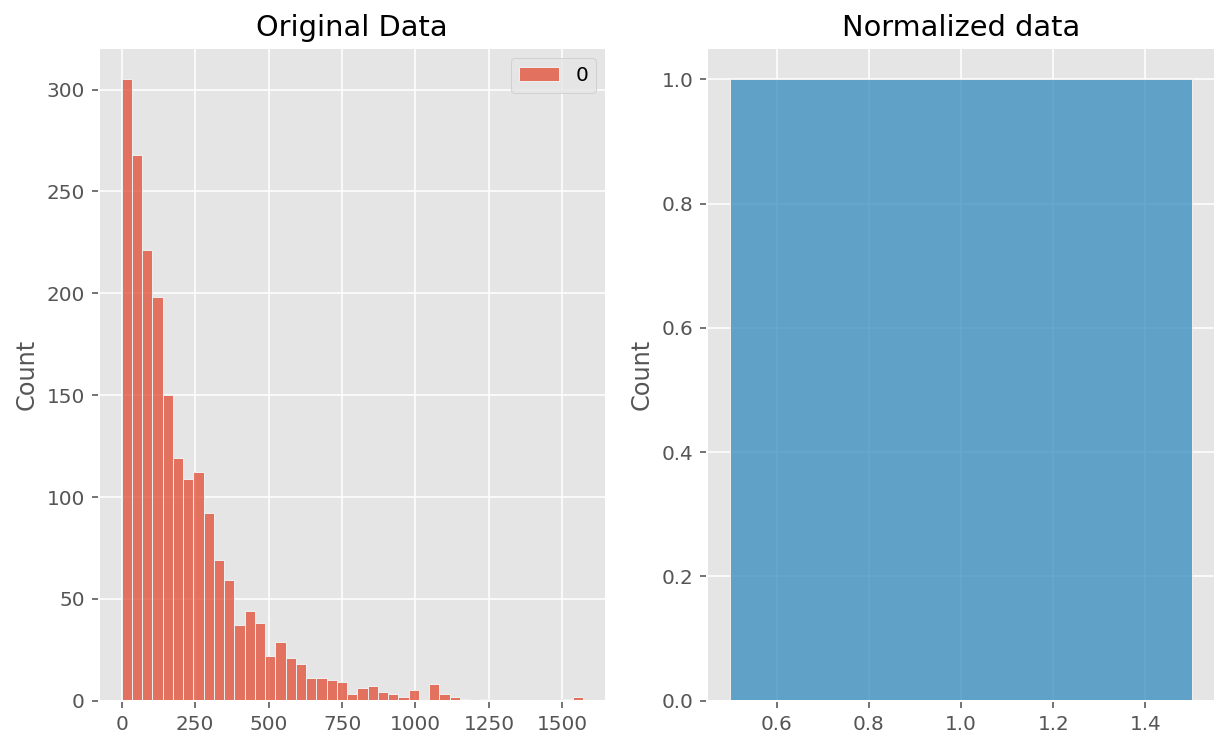

In [437]:

from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [439]:
#For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance:
#● Start by identifying the top 10 handsets used by the customers.
#● Then, identify the top 3 handset manufacturers
#● Next, identify the top 5 handsets per top 3 handset manufacturer
#● Make a short interpretation and recommendation to marketing teams

In [440]:
#Start by identifying the top 10 handsets used by the customers.
df["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [441]:
#identify the top 3 handset manufacturers
df["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [442]:
apple_handsets = df[df["Handset Manufacturer"] == "Samsung"]
apple_handsets["Handset Type"].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [443]:
apple_handsets = df[df["Handset Manufacturer"] == "Huawei"]
apple_handsets["Handset Type"].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [444]:
#● Make a short interpretation and recommendation to marketing tea\
# the marketing team has to make full attention on cleaning above handests

In [445]:
#Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.
#● Aggregate per user the following information in the column
#○ number of xDR sessions
#○ Session duration
#○ the total download (DL) and upload (UL) data
#○ the total data volume (in Bytes) during this session for each application

In [446]:
sessions = df[["MSISDN/Number","Bearer Id"]]
session_count = sessions.groupby(["MSISDN/Number"]).count()
session_count

,Bearer Id
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [447]:
session_count.describe()

,Bearer Id
count,106856.000000
mean,1.393792
std,0.806022
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


In [448]:
df_usage = df[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
df_usage.groupby(["MSISDN/Number"]).agg('sum')

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
3.360100e+10,116720140.0,8.426375e+08,36053108.0
3.360100e+10,181230963.0,1.207552e+08,36104459.0
3.360100e+10,134969374.0,5.566597e+08,39306820.0
3.360101e+10,49878024.0,4.019932e+08,20327526.0
3.360101e+10,37104453.0,1.363130e+09,94280527.0
...,...,...,...
3.379000e+10,8810688.0,6.879252e+08,26716429.0
3.379000e+10,140988659.0,4.445751e+08,35732243.0
3.197021e+12,877385325.0,1.948281e+08,37295915.0


In [449]:
df["Total Google"] = df["Google DL (Bytes)"] + df["Google UL (Bytes)"]
df["Total Youtube"] = df["Youtube DL (Bytes)"] + df["Youtube UL (Bytes)"]
df["Total Netflix"] = df["Netflix DL (Bytes)"] + df["Netflix UL (Bytes)"]
df["Total Email"] = df["Email DL (Bytes)"] + df["Email UL (Bytes)"]
df["Total Gaming"] = df["Gaming DL (Bytes)"] + df["Gaming UL (Bytes)"]
df["Total Social Media"] = df["Social Media DL (Bytes)"] + df["Social Media UL (Bytes)"]
df["Total Other"] = df["Other DL (Bytes)"] + df["Other UL (Bytes)"]


app_df = df[["Bearer Id","MSISDN/Number","Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", 
                 "Total Social Media", "Total Other"]]
app_df.groupby(["MSISDN/Number"]).agg('sum')

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other
MSISDN/Number,,,,,,,
3.360100e+10,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0
3.360100e+10,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0
3.360100e+10,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0
3.360101e+10,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0
3.360101e+10,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0
3.379000e+10,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0
3.197021e+12,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0


In [450]:
#Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights.
#Ensure that you identify and treat all missing values and outliers in the dataset by replacing by 
#the mean of the corresponding column.

In [451]:
#checking for null values
df[["Dur. (ms).1","Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].isna().sum().head(60)

Dur. (ms).1           0
Total DL (Bytes)      0
Total UL (Bytes)      0
Total Social Media    0
Total Google          0
Total Email           0
Total Youtube         0
Total Netflix         0
Total Gaming          0
dtype: int64

In [453]:
#filling the null values with the mean of the column
df["Total DL (Bytes)"].fillna(df["Total DL (Bytes)"].mean(), inplace = True)
df["Total UL (Bytes)"].fillna(df["Total UL (Bytes)"].mean(), inplace = True)
df["Dur. (ms).1"].fillna(df["Dur. (ms).1"].mean(), inplace = True)

In [454]:
df[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube",
      "Total Netflix", "Total Gaming"]].describe()

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Total Social Media,Total Google,Total Email,Total Youtube,Total Netflix,Total Gaming
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046091e+08,4.546434e+08,4.112121e+07,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08
std,8.103734e+07,2.441421e+08,1.127635e+07,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08
min,7.142988e+06,7.114041e+06,2.866892e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,5.744206e+07,2.431072e+08,3.322203e+07,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08
50%,8.639998e+07,4.558409e+08,4.114324e+07,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08
75%,1.324307e+08,6.657051e+08,4.903424e+07,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08
max,1.859336e+09,9.029696e+08,7.833131e+07,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08


In [455]:
#checking for skewness
df.skew()

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < UL TP < 50 Kbps (%)                10.943888
50 Kbps < 

<AxesSubplot:>

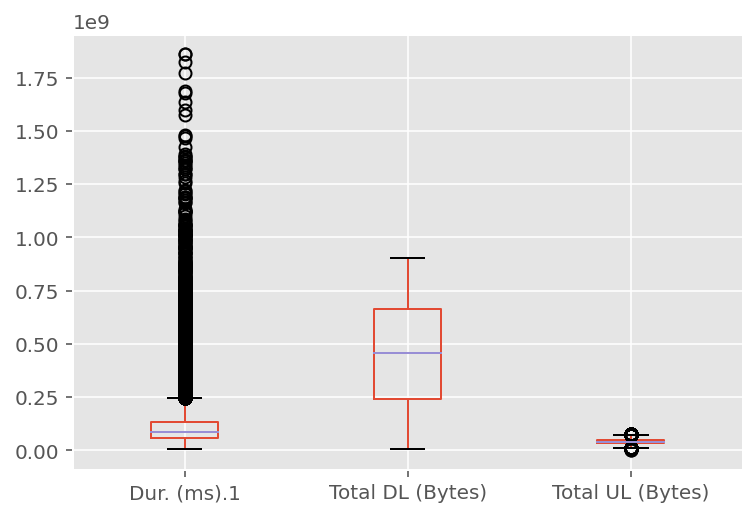

In [456]:
#looking for the outliers
df.boxplot(column=['Dur. (ms).1', "Total DL (Bytes)","Total UL (Bytes)"])

Text(0.5, 1.0, 'Duration Histogram')

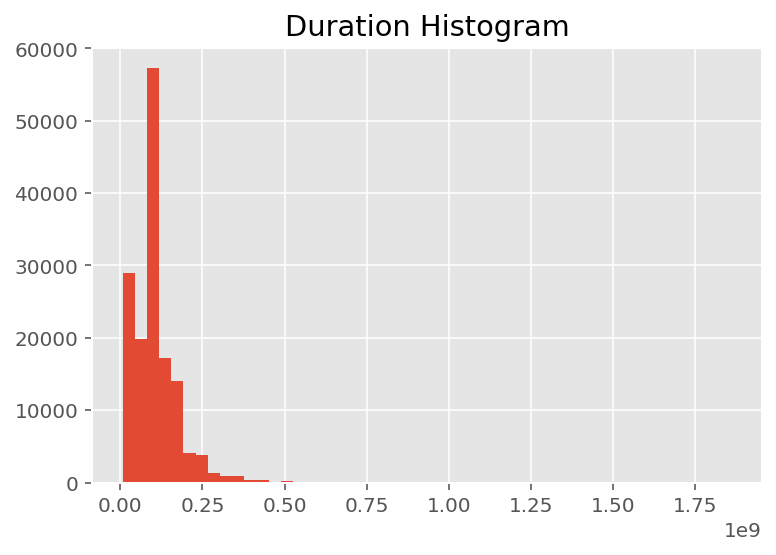

In [457]:
#plotting variable distributions
df["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")

Text(0.5, 1.0, 'Total Download Histogram')

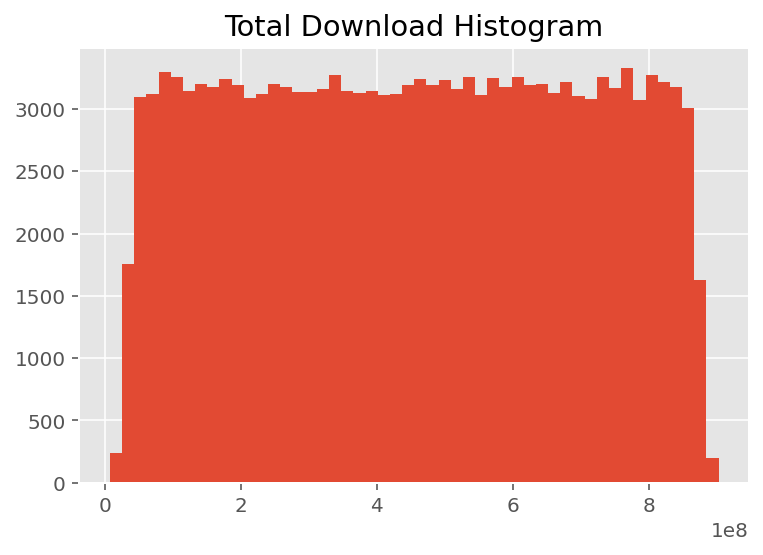

In [458]:
#ploting Histogram for Total Download 

df["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")

Text(0.5, 1.0, 'Total Upload Histogram')

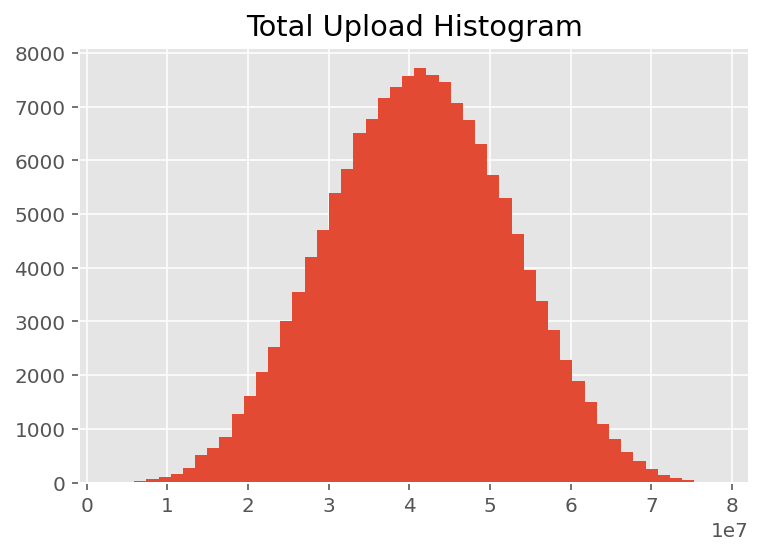

In [459]:
#ploting Histogram Total Upload 
df["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")